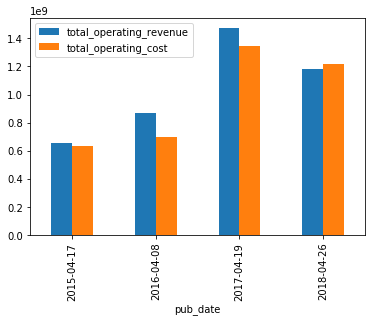

In [4]:
import os
from jqdatasdk import *


auth(os.environ['JOINT_QUANT_USERNAME'],os.environ['JOINT_QUANT_PWD'])

#查询平高电气
pinggao_stock='600312.XSHG'

df=finance.run_query(query(finance.STK_INCOME_STATEMENT).filter(finance.STK_INCOME_STATEMENT.code==pinggao_stock,finance.STK_INCOME_STATEMENT.pub_date>='2015-01-01').limit(3000))

#试图将pub_date转换成datetime,结果发现它已经是了
#df.index=df.pub_date.apply(lambda pub_date : datetime.strptime(pub_date, "%y-%m-%d"))

df.index=df.pub_date
#发现数据相同pub_date有不同值
#找到相距的长度
df['diff_end_start_date']=(df.end_date-df.start_date)
#增加一个域记录相差天数
df['start_end_days']=df.diff_end_start_date.apply(lambda d : d.days)
df['start_end_days']

#report_type 0 本期， 1 上期
df.loc[((df.start_end_days ==90) | (df.start_end_days ==89))& (df.report_type==0),['total_operating_revenue','total_operating_cost']].plot.bar()

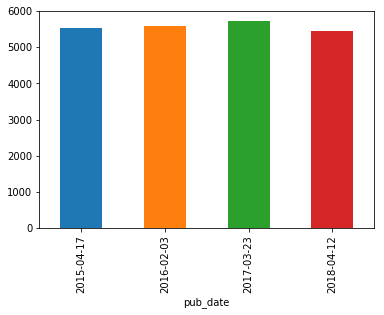

In [5]:
# 员工人数没啥意义，因为没有研究生以上人员比例
q=query(finance.STK_EMPLOYEE_INFO).filter(finance.STK_EMPLOYEE_INFO.code==pinggao_stock,
                                          finance.STK_EMPLOYEE_INFO.pub_date>='2015-01-01')
df_emploee=finance.run_query(q)

df_emploee.index=df_emploee.pub_date
df_emploee.loc[:,'employee'].plot.bar()